In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = [16, 12]

import math
import numpy as np

from interaction import Interaction
from environment import Environment
from fish import Fish
from channel import Channel
from observer import Observer

from utils import generate_distortion, generate_fish, run_simulation

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
Please wait patiently 5 seconds. Thanks.
It's time to say bye bye!


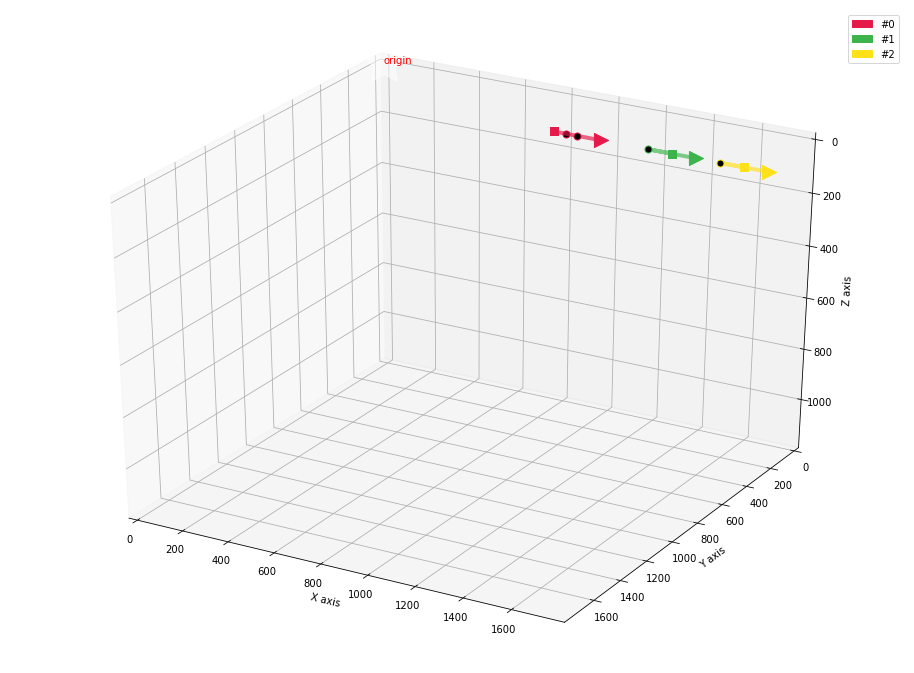

In [106]:
#uncomment: 69 in environment; 449 in fish

from events import Move

run_time = 5 # in seconds
num_fish = 3
arena_size = np.array([1780, 1780, 1170])
arena_center = arena_size / 2.0
initial_spread = 500
#fish_pos = initial_spread * np.random.rand(num_fish, 3) + arena_center - initial_spread / 2.0
fish_pos = np.array([[1000, 100, 100], [1400, 100, 100], [1700, 100, 100]])#, [100, 400, 100], [400, 400, 100], [700, 400, 100], [100, 700, 100], [400, 700, 100], [700, 700, 100]])
clock_freqs = 1
verbose = False

distortion = generate_distortion(type='none', magnitude=1, n=math.ceil(arena_size[0]/10), show=False)
environment = Environment(
    arena_size=arena_size,
    node_pos=fish_pos,
    distortion=distortion,
    prob_type='binary',
    conn_thres=2500,
    conn_drop=1,
    noise_magnitude=0,
    verbose=verbose
)
interaction = Interaction(environment, verbose=verbose)
channel = Channel(environment)

fish = generate_fish(
    n=num_fish, 
    channel=channel, 
    interaction=interaction,
    target_dist=390,
    lim_neighbors=[2,3],
    neighbor_weights=1.0,
    fish_max_speeds=100,
    clock_freqs=clock_freqs,
    verbose=verbose
)
channel.set_nodes(fish)
observer = Observer(fish=fish, environment=environment, channel=channel)

migrate = Move(-50, 0, 0)
observer.instruct(event=migrate, rel_clock=0, fish_all=True)

run_simulation(fish=fish, observer=observer, run_time=run_time, dark=False, white_axis=False, no_legend=False)

Please wait patiently 20 seconds. Thanks.
It's time to say bye bye!


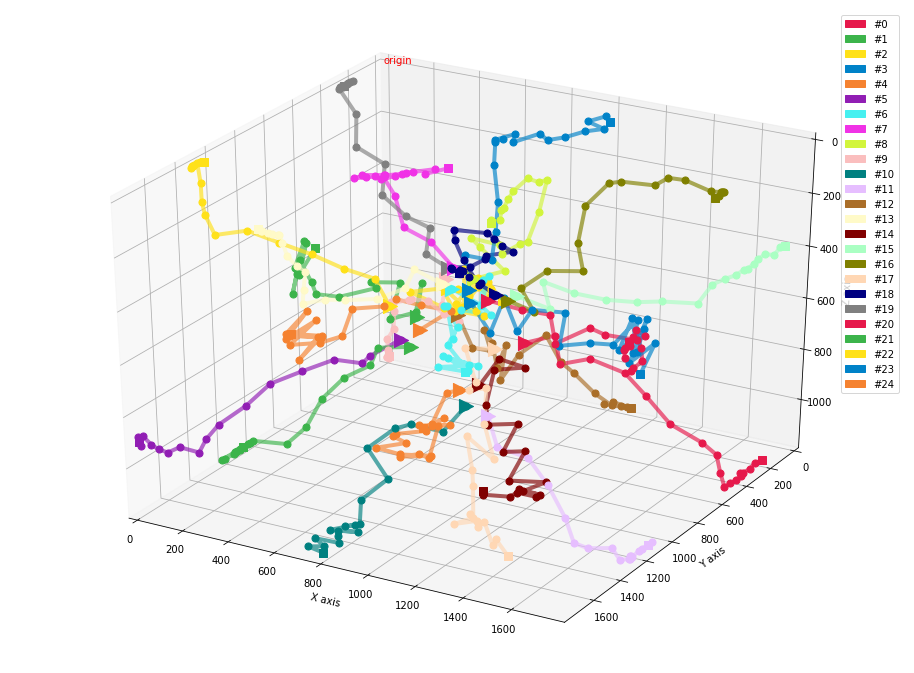

In [17]:
run_time = 20 # in seconds
num_fish = 25
arena_size = np.array([1780, 1780, 1170])
arena_center = arena_size / 2.0
initial_spread = 500
fish_pos = initial_spread * np.random.rand(num_fish, 3) + arena_center - initial_spread / 2.0
fish_speed = 130
fish_vel = fish_speed / 3 * np.random.rand(num_fish, 3)
clock_freqs = 1
verbose = False

distortion = generate_distortion(type='none', magnitude=1, n=math.ceil(arena_size[0]/10), show=False)
environment = Environment(
    arena_size=arena_size,
    node_pos=fish_pos,
    node_vel=fish_vel,
    distortion=distortion,
    prob_type='binary',
    conn_thres=2500,
    conn_drop=1,
    noise_magnitude=10,
    verbose=verbose
)
interaction = Interaction(environment, verbose=verbose)
channel = Channel(environment)

fish = generate_fish(
    n=num_fish, 
    channel=channel, 
    interaction=interaction,
    target_dist=1000,
    lim_neighbors=[2,3],
    neighbor_weights=1.0,
    fish_max_speeds=fish_speed,
    clock_freqs=clock_freqs,
    verbose=verbose
)
channel.set_nodes(fish)

observer = Observer(fish=fish, environment=environment, channel=channel)
run_simulation(fish=fish, observer=observer, run_time=run_time, dark=False, white_axis=False, no_legend=False)